<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [83]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

В каждой строке таблицы — данные о квартире, выставленной на продажу.  
Колонки описывают разные признаки квартиры:  
*airports_nearest* — расстояние до ближайшего аэропорта в метрах (м);    
*balcony* — число балконов;  
*ceiling_height* — высота потолков (м);  
*cityCenters_nearest* — расстояние до центра города (м);  
*days_exposition* — сколько дней было размещено объявление (от публикации до снятия);  
*first_day_exposition* — дата публикации;  
*floor* — этаж;  
*floors_total* — всего этажей в доме;  
*is_apartment* — апартаменты (булев тип);  
*kitchen_area* — площадь кухни в квадратных метрах (м²);  
*last_price* — цена на момент снятия с публикации;  
*living_area* — жилая площадь в квадратных метрах (м²);  
*locality_name* — название населённого пункта;  
*open_plan* — свободная планировка (булев тип);  
*parks_around3000* — число парков в радиусе 3 км;  
*parks_nearest* — расстояние до ближайшего парка (м);  
*ponds_around3000* — число водоёмов в радиусе 3 км;  
*ponds_nearest* — расстояние до ближайшего водоёма (м);  
*rooms* — число комнат;  
*studio* — квартира-студия (булев тип);  
*total_area* — площадь квартиры в квадратных метрах (м²);  
*total_images* — число фотографий квартиры в объявлении.  
Всего в таблице 23699 строк и 22 столбца.  
В данных есть пропуски и некорректные значения, поэтому для дальнейшего анализа, нам необходимо обработать данные.



## Предобработка данных

Приведем названия колонок к правильному синтаксису

In [84]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
print(len(data))

23699


In [85]:
(data.isna().mean()*100).round(1)

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
city_centers_nearest    23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Функция isna() показала, что в некоторых столбцах имеются пропуски. Начнем их обработку.  


Возьмем два столбца total_area (общая площадь) и living_area (жилая площадь). В общей площади нет пропусков, поэтому мы можем заполнить 1903 пропуска в колонке с жилой площадью.

In [86]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.6)
data['living_area'].isna().sum()
print(len(data))

23699


Следующий столбец для преобразований: is_apartment. В нем содержатся булевы значения. True - апартаменты, False - не аппартаменты.  
Будем считать, что там где стоит пропуск - будут не апартаменты (False)

In [87]:
data['is_apartment'].unique()
print(len(data))

23699


In [88]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()
print(len(data))

23699


В колонке с этажностью дома всего 86 пропусков, заменим знаяение в колонке floors_total на floor для пропущенных значений.

In [89]:
data['floors_total'].isna().sum()

86

In [90]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].isna().sum()
print(len(data))

23699


Так же много пропусков в столбце ceiling_height (высота потолков).  
В жилом помещении высота потолков не может быть больше 5 метров и меньше 2.5, поэтому мы заменим значения строк с некорректными данными с помощью функции. Остальные значения NaN заменим на медиану, сгруппировав по этажности дома. 

In [91]:
display(data['ceiling_height'].value_counts())
data['ceiling_height'].unique()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [92]:
def ceiling_func(high):
    if high <= 2.4 or high >=5:
        return 2.65
    return high

data['ceiling_height'] = data['ceiling_height'].apply(ceiling_func)
display(data[data['ceiling_height'].isna()])
print(len(data))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,95.4,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,False,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,False,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,False,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,False,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


23699


In [93]:
data_transformed = data.groupby('floors_total')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(data_transformed)
display(data[data['ceiling_height'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0


Группировка не помогла для единсвенного значения, т.к. оно уникально (33 этаж). Заполним это значение вручную

In [94]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
display(data[data['ceiling_height'].isna()])
print(len(data))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


23699


Уберем пропуски в балконах. Будем считать, что если стоит пропуск в колонке balcony, то в квартире балкона нет.

In [95]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()
print(len(data))

23699


Столбец kitchen_area (площадь кухни) нам необходим для дальнейшего анализа. Заполним пропуски разницей между общей площадью и жилой площадью.

In [96]:
data['kitchen_area'].fillna(data['total_area'] - data['living_area'], inplace=True)
data['kitchen_area'].isna().sum()
print(len(data))

23699


Разберемся с пропусками в колонке locality_name.

Избавимся в названиях от типа населенных пунктов.

In [98]:
data['locality_name'] = data['locality_name'].astype('str')

In [99]:
def first_up_pos(item):
    string = str(item)
    res = [index for index in range(len(string)) if string[index].isalpha() and string[index].isupper()]
    return 0 if len(res) == 0 else res[0]
    
data['locality_name'] = data['locality_name'].apply(lambda x: x[first_up_pos(x):])

In [137]:
a = data['locality_name'].unique()
a.sort()
print(a)

['nan' 'Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро'
 'Барышево' 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпосёлок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисепп

In [101]:
print(len(data))
#display(data[data['locality_name'].isna()])
#data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='max')

data['locality_name'].value_counts()

23699


Санкт-Петербург       15721
Мурино                  590
Кудрово                 472
Шушары                  440
Всеволожск              398
                      ...  
Пельгора                  1
Форт Красная Горка        1
Новая Ропша               1
Тёсово-4                  1
Пчева                     1
Name: locality_name, Length: 306, dtype: int64

In [102]:
data['locality_name'] = data['locality_name'].fillna('Не задано')

In [103]:
print(len(data))
data.isna().sum()

23699


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

days_exposition содержит пропущенные значения. Это говорит о том, что объявление еще активно и продажи не было. Т.к. нам нужно в дальнейшем исследовать этот столбец, то устраним пропуски в нем и оставим 0.

In [104]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Для дальнейших расчетов нам необходимы еще 2 колонки: airports_nearest и city_centers_nearest.  
Сгруппируем данные по locality_name и заполним медианным значением для каждого города.


In [105]:
data_transformed = data.groupby('locality_name')['airports_nearest'].transform('median')
data['airports_nearest'] = data['airports_nearest'].fillna(data_transformed)
display(data[data['airports_nearest'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,19.68,2,False,...,13.12,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,27.48,1,False,...,18.32,0.0,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,27.00,0.0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [106]:
data_transformed = data.groupby('locality_name')['city_centers_nearest'].transform('median')
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data_transformed)
display(data[data['city_centers_nearest'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,19.68,2,False,...,13.12,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,27.48,1,False,...,18.32,0.0,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,27.00,0.0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [107]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [108]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Группировка не сработала на населенных пунктах, для которых недостаточно данных. Но нас интересует только Санкт-Петербург, поэтому мы оставим в этой колонке пропуски. Так же нас не побеспокоят пропуски в остальных колонках, они не нужны для анализа.

Проверим датафрейм на наличие дубликатов и удалим их. (Явных дубликатов не обнаружено)

In [109]:
data = data.drop_duplicates().reset_index(drop=True)
len(data)

23699

В нескольких колонках необходимо изменить тип данных. Например,  first_day_exposition имеет тип данных object, но там содержится дата и время. А так же изменить тип данных в столбце days_exposition, floors_total и last_price на целочисленный.

In [110]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,95.4,9,False,...,63.6,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [111]:
data['floors_total'] = data['floors_total'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')
data['days_exposition'] = data['days_exposition'].astype('int64')

## Расчёты и добавление результатов в таблицу

Добавим в датафрейм колонку с ценой за квадратный метр.

In [112]:
data['price_m'] = (data['last_price'] / data['total_area']).round(1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.4
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.8
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.7
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.4,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.1
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0


Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления.

In [113]:
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370.4,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,82920.8,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785.7,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.4,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176.1,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018


Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой

In [114]:
def floor_category(data): #категоризация по этажам
    if data['floor'] == data['floors_total']:
        return 'последний'
    if data['floor'] == 1:
        return 'первый'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0,120370.4,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82920.8,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785.7,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.4,9,False,...,2.0,84.0,3.0,234.0,424,408176.1,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой


Посчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [115]:
data['living_total_area'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_total_area'] = (data['kitchen_area'] / data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year,floor_category,living_total_area,kitchen_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,0,120370.4,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0.0,NaN,81,82920.8,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2.0,574.0,558,92785.7,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.4,9,False,...,3.0,234.0,424,408176.1,4,7,2015,другой,0.60,0.40
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.0,1,6,2018,другой,0.32,0.41


## Исследовательский анализ данных

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Построим гистограмму для данных колонки total_area.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c708e6c90>]],
      dtype=object)

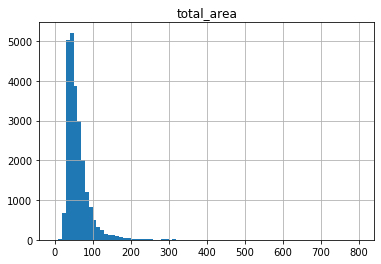

In [195]:
data.hist('total_area', bins=80, range=(0, 800))

Распределение нормальное, большинство квартир в объявлениях имеют площадь от 35 до 70 м кв. После 100 м кв график начинает стремиться к 0 и на отмтке в 200 практически с ним сливается. Установим верхнюю границу в 600 м кв.

Построим гистограмму для данных колонки last_price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc2fb6310>]],
      dtype=object)

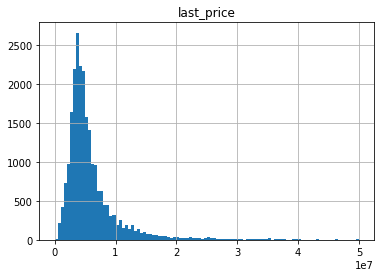

In [139]:
data.hist('last_price', bins=100, range=(0,50000000))

Распределение нормальное. Верхнюю границу примем в 40 млн рублей.

Построим гистограмму для данных колонки rooms.

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

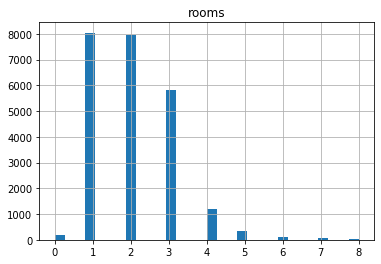

In [190]:
data.hist('rooms', bins=30, range=(0,8))
data['rooms'].value_counts()

Большинство квартир на продаже имеют 1-2-3 комнаты. Установим верхнюю границу в 8 комнат.

Построим гистограмму для данных колонки ceiling_height

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc34a5f50>]],
      dtype=object)

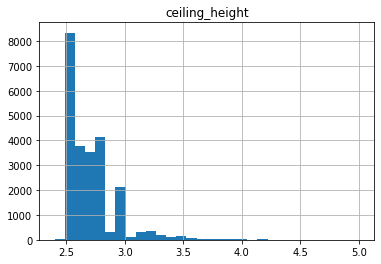

In [119]:
data.hist('ceiling_height', bins=30, range=(2.4, 5))

Большиснтво квартир имеют потолки 2.5 метров. После 3.5 м график стремится к нулю. Установим верхнюю границу в 5 м.

Изучим время продажи квартиры.


count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cc33e69d0>]],
      dtype=object)

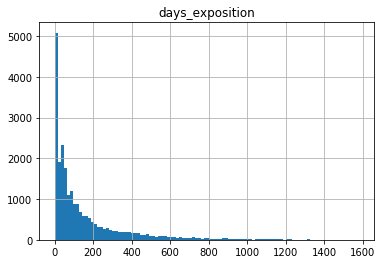

In [120]:
display(data['days_exposition'].describe())
data.hist('days_exposition', bins=100)

На графике есть аномалия: пик на отметке 0. Дело в том, что эти объвления все еще активны и продажи по ним не было. Для дальнейшего анализа следует их исключить из датафрейма. Но таким образом мы удалим слишком много строк.  
В среднем продажи длятся 75 дней. Продажа прошла быстро, если квартира продалась за первые 22 дня. Если квартира продается более 200 дней, то продажу можно считать долгой.  
Продажти продолжительностью 200 дней — уже редки. Дольше 600 дней почти не продаются. А на участке более 800 дней гистограмма сливается с нулём.
Примем верхнюю границу в 800 дней.


Продолжим исследовать данные, удовлетворяющие условиям:  
total_area <= 200;  
last_price <= 20000000;  
rooms <= 5;  
ceiling_height <=4;  
days_exposition != 0 and <=800;  
Но такие условия отметают слишком много строк. 

In [193]:
data_new = data.query('total_area <= 600 and rooms <=8 and days_exposition <=800')
display(data_new)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year,floor_category,living_total_area,kitchen_total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,0,120370.4,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,0.0,NaN,81,82920.8,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,2.0,574.0,558,92785.7,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.60,14,95.40,9,False,...,3.0,234.0,424,408176.1,4,7,2015,другой,0.60,0.40
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000.0,1,6,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3.0,381.0,0,72490.8,1,3,2017,другой,0.55,0.10
23695,14,3100000,59.00,2018-01-15,3,2.55,5,38.00,4,False,...,NaN,NaN,45,52542.4,0,1,2018,другой,0.64,0.14
23696,18,2500000,56.70,2018-02-11,2,2.80,3,29.70,1,False,...,NaN,NaN,0,44091.7,6,2,2018,первый,0.52,0.48
23697,13,11475000,76.75,2017-03-28,2,3.00,17,46.05,12,False,...,3.0,196.0,602,149511.4,1,3,2017,другой,0.60,0.30


In [192]:
print(len(data_new)/len(data))

0.974260517321406


Изучим факторы, влияющие на стоимость жилья.  
Первый фактор для изучения - общая площадь квартиры.

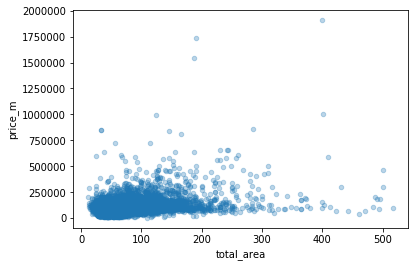

In [194]:
data_new.sort_values('total_area').plot(x='total_area', y='price_m', kind='scatter', alpha=0.3)

Есть основная масса точек с наиболее частыми сочетаниями цены за квадратный метр и общей площадью. При этом с увеличением площади увеличивается и стоимость. Но это лишь в среднем. Существуют квартиры с маленькой площадью и высокой стоимостью и наоборот.
На графике можно увидеть взаимосвязь между двумя величинами. А также понять, какие данные типичны, а какие — аномальны.

Рассмотрим взаимосвязь общего числа комнат в квартире и стоимости квадратного метра.

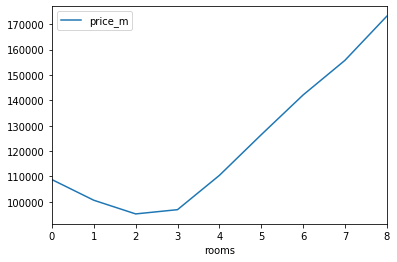

In [197]:
data_new.pivot_table(index=['rooms'], values='price_m', aggfunc='mean').plot()

Взаимосвязь четко прослеживается. Для студий будет самая высокая стоимость за квадратный метр. И чем больше комнат в квартире, тем меньше стоимость квадратного метра.

Определим как этаж влияет на стоимость квартиры.

In [198]:
data_new.pivot_table(index=['floor_category'], values='price_m', aggfunc='mean')

,price_m
floor_category,
другой,103177.444821
первый,82126.286396
последний,93020.018524


На первых и последних этажах квартиры дешевле, чем на любых других.

Посмотрим на взаимосвязь удалённости от центра и ценой за квадратный метр.

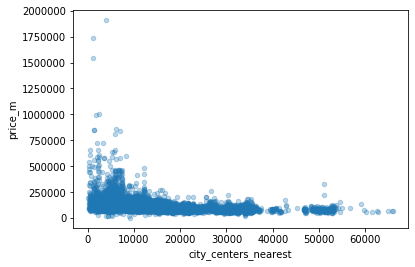

In [199]:
data_new.sort_values('city_centers_nearest').plot(x='city_centers_nearest', y='price_m', kind='scatter', alpha=0.3)

В целом, взаимосвязь есть. Чем дальше от центра, тем ниже цена квадратного метра. Однако есть и аномальные значения.

Также изучим зависимость от даты размещения: дня недели, месяца и года.

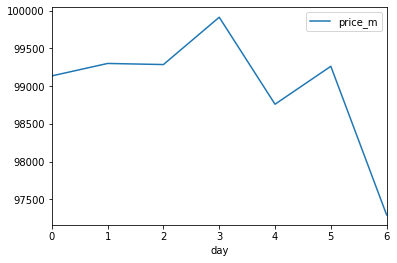

In [205]:
data_new.pivot_table(index=['day'], values='price_m', aggfunc='mean').plot()

Выгоднее всего выставлять объявления в четверг. А в воскресенье лучше не стоит.

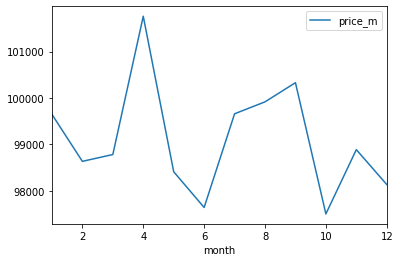

In [201]:
data_new.pivot_table(index=['month'], values='price_m', aggfunc='mean').plot()

Выгоднее всего продавать квартры в апреле, а вот в октябре лучше не стоит.

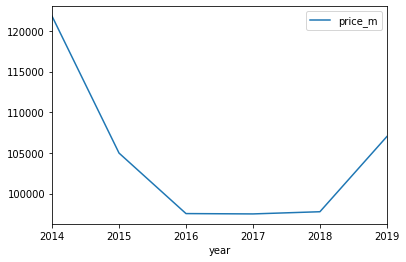

In [202]:
data_new.pivot_table(index=['year'], values='price_m', aggfunc='mean').plot()

С 2014 по 2016 года был тренд на снижение стоимости жилья, однако в 2016 картина более-менее стабилизировалась и уже с 2018 года пошел активный рост стоимости квадратного метра.

С помощью матрицы корреляции оценим какой из факторов влияет больше всего.

In [203]:
data.corr().style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year,living_total_area,kitchen_total_area
total_images,1,0.104473,0.115352,0.0992881,0.0496918,0.0111471,0.0995983,0.0313405,0.0105317,-0.029303,-0.0244073,0.0431412,0.0489032,-0.0155378,-0.053192,0.02112,-0.00834727,-0.0115531,-0.00303414,-0.0555934,0.13278,-0.0104329,0.00504252,0.140411,-0.00852616,-0.0820327
last_price,0.104473,1,0.653675,0.363343,0.286123,-0.00699318,0.586123,0.0265756,0.0269575,-0.0253618,-0.00880212,0.456883,0.00855938,-0.0434991,-0.212472,0.151058,-0.0164139,0.159996,-0.084809,0.0535769,0.736499,0.00155015,0.00277913,-0.043089,0.00341588,-0.0552449
total_area,0.115352,0.653675,1,0.758344,0.397161,-0.0756516,0.946661,-0.0247539,0.0296329,-0.0726533,-0.0348847,0.576073,0.00994097,-0.0564662,-0.240048,0.164689,-0.0214973,0.162346,-0.0979686,0.0970387,0.30196,-0.00469472,0.00492035,-0.0799119,0.134717,-0.23225
rooms,0.0992881,0.363343,0.758344,1,0.232891,-0.227227,0.824977,-0.150862,0.000399275,-0.147286,-0.0875003,0.277675,-0.0155192,-0.0928793,-0.198096,0.137257,-0.0545494,0.0926928,-0.0576889,0.0792929,0.0554197,-0.00413412,-0.00446898,-0.0554185,0.459868,-0.444796
ceiling_height,0.0496918,0.286123,0.397161,0.232891,1,-0.0390954,0.370012,-0.0163158,0.0668959,0.0111641,0.00593934,0.274654,-0.0545802,-0.0793135,-0.300347,0.225781,-0.0637027,0.210773,-0.122987,0.0772506,0.29987,-0.0159517,0.000477342,-0.0565436,-0.0331736,0.0110282
floors_total,0.0111471,-0.00699318,-0.0756516,-0.227227,-0.0390954,1,-0.158246,0.678109,-0.0262924,0.0695219,0.0507281,0.085176,0.172724,0.160235,0.0491891,-0.252489,0.0969715,-0.12296,0.0390547,-0.0266056,0.147838,0.0131867,0.0157528,0.00840862,-0.3462,0.257546
living_area,0.0995983,0.586123,0.946661,0.824977,0.370012,-0.158246,1,-0.0888997,0.0291231,-0.0564866,-0.0243624,0.459555,-0.0122846,-0.0781105,-0.238982,0.178411,-0.0483136,0.148521,-0.0843876,0.0899006,0.232255,-0.00315465,-0.000802245,-0.0707876,0.395504,-0.335823
floor,0.0313405,0.0265756,-0.0247539,-0.150862,-0.0163158,0.678109,-0.0888997,1,-0.0132937,0.0369403,0.0358241,0.0764376,0.168567,0.111175,0.0316798,-0.163784,0.0730452,-0.0763124,0.0248496,-0.0213489,0.129068,0.0123468,0.0193871,0.00491456,-0.251577,0.178053
is_apartment,0.0105317,0.0269575,0.0296329,0.000399275,0.0668959,-0.0262924,0.0291231,-0.0132937,1,-0.00365743,-0.00244831,0.0492457,0.033022,0.0147938,0.0046797,0.0207666,-0.0334098,0.0239892,0.00335707,0.00861971,0.0447254,-0.00949172,0.00236917,0.00941307,0.00318017,0.0308089
studio,-0.029303,-0.0253618,-0.0726533,-0.147286,0.0111641,0.0695219,-0.0564866,0.0369403,-0.00365743,1,-0.00423531,-0.0253185,0.0288987,0.00251755,0.00561168,-0.0302023,0.00913377,0.000938954,0.00260635,-0.0177663,0.0156365,-0.000843471,0.000976238,0.0119605,0.0851076,0.0975309


Стоимость квартиры зависит от ее технических характеристик (площадь, кол-во комнат) и его расположения (близость к центру, близость парков и прудов). Что вполне себе вписывется в общие представления теории о ценообразовании в сегменте жилой недвижимости

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Определим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [206]:
data_new['locality_name'].value_counts().head(10)

Санкт-Петербург    15279
Мурино               577
Кудрово              462
Шушары               433
Всеволожск           389
Пушкин               356
Колпино              334
Парголово            322
Гатчина              298
Выборг               230
Name: locality_name, dtype: int64

In [207]:
top_locality = data_new.pivot_table(index='locality_name', values='price_m', aggfunc=['count','mean']).round(2)
top_locality.columns = ['ads_amount','price_m_mean']
top_locality = top_locality.sort_values('ads_amount', ascending=False).query('ads_amount>=230')
top_locality

,ads_amount,price_m_mean
locality_name,,
Санкт-Петербург,15279,114571.40
Мурино,577,86229.40
Кудрово,462,95406.79
Шушары,433,78601.21
Всеволожск,389,68694.77
Пушкин,356,103028.06
Колпино,334,75368.39
Парголово,322,90077.25
Гатчина,298,68920.77


В таблице top_locality приведен топ-10 городов по количеству объявлений.  
Как и предполагалось, самая высокая стоимость квадратного метра в Санкт-Петербурге. Самая низкая - в Выборге.

выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

In [208]:
spb_data = data_new.query('locality_name == "Санкт-Петербург"')
spb_data['city_center_km'] = spb_data['city_centers_nearest']/1000
pd.set_option('chained_assignment', None)

In [209]:
spb_data['city_center_km'] = spb_data['city_center_km'].astype('int')
group_spb = spb_data.groupby('city_center_km')['price_m'].agg('median')
pd.set_option('chained_assignment', None)

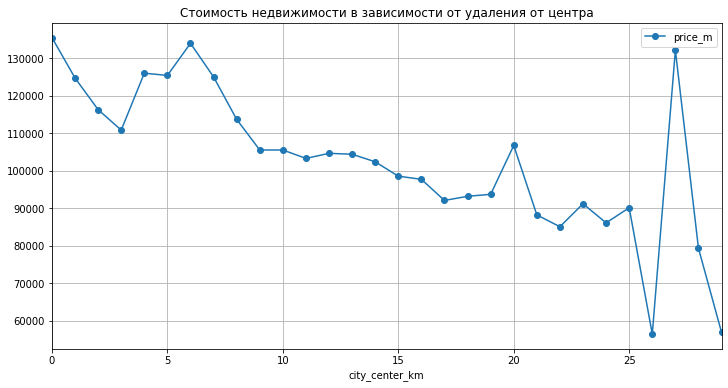

In [210]:
group_spb.plot(x='city_center_km', y = 'price_m',style = 'o-', grid=True, figsize=(12, 6), legend=True, title='Стоимость недвижимости в зависимости от удаления от центра')

На графике есть один подозрительный экстремум ( примерно 27-28 км от центра). Думаю, что на таком расстоянии от центра расположен пристижный район, где цена за метр сильно отличается от всего остального. А так же,аномалия могла появиться из-за заполения пропусков в колонке locality_name.Однако, чтобы определить границы центра необходимо посмотерть на первый экстремум (6 км) после которого начинается спад. Поэтому я считаю, что центральная зона находится до 6 км от центра. 

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).Поймём, отличаются ли они от общих выводов по всему городу.


In [211]:
spb_center = spb_data.query('city_center_km <= 6')

In [212]:
spb_center['total_area'].describe()

count    3123.000000
mean       92.305488
std        55.938136
min        12.000000
25%        57.000000
50%        79.000000
75%       110.000000
max       517.000000
Name: total_area, dtype: float64

In [213]:
spb_data['total_area'].describe()

count    15279.000000
mean        63.845801
std         37.602221
min         12.000000
25%         41.710000
50%         54.700000
75%         74.000000
max        517.000000
Name: total_area, dtype: float64

Квартиры, выставленные на продаже в центре, в среднем, имеют большую площадь (92 м против 63 м)

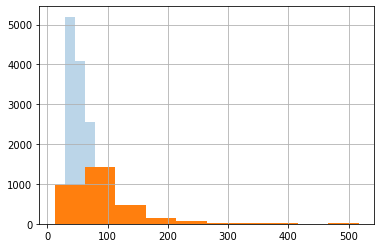

In [214]:
spb_data['total_area'].hist(bins=30,alpha=0.3)
spb_center['total_area'].hist(bins=10)

Рассотрим как отличается итоговая стоимость для центра Санкт-Петербурга и остальных объявлений в этом городе.

In [215]:
spb_center['last_price'].describe()

count    3.123000e+03
mean     1.457142e+07
std      2.387627e+07
min      1.600000e+06
25%      6.700000e+06
50%      9.200000e+06
75%      1.435000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [216]:
spb_data['last_price'].describe()

count    1.527900e+04
mean     7.883837e+06
std      1.207614e+07
min      1.219000e+04
25%      4.200000e+06
50%      5.500000e+06
75%      8.000000e+06
max      7.630000e+08
Name: last_price, dtype: float64

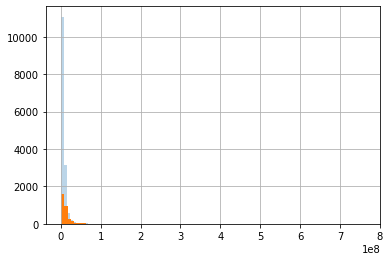

In [217]:
spb_data['last_price'].hist(bins=100,alpha=0.3)
spb_center['last_price'].hist(bins=100)

Недвижимость в центре, в среднем, дороже, чем во всем остальном городе (что логично).

Посмотрим на распределение количества комнат по объявлениям в центре и в остальном городе.


In [218]:
spb_center['rooms'].value_counts()

3    963
2    921
1    456
4    436
5    196
6     78
7     51
0     15
8      7
Name: rooms, dtype: int64

In [219]:
spb_data['rooms'].value_counts()

2    4982
1    4843
3    3993
4     924
5     270
0     109
6      96
7      54
8       8
Name: rooms, dtype: int64

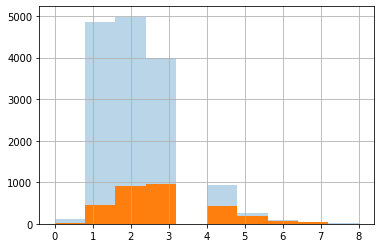

In [220]:
spb_data['rooms'].hist(bins=10,alpha=0.3)
spb_center['rooms'].hist(bins=10)

В центре Питера, чаще выставляют на продажу трехкомнатные квартиры, тогдак как в остальном городе преобладают двухкомнатные квартиры.

In [221]:
spb_center['ceiling_height'].describe()

count    3123.000000
mean        2.978649
std         0.346097
min         2.450000
25%         2.700000
50%         3.000000
75%         3.150000
max         4.900000
Name: ceiling_height, dtype: float64

In [222]:
spb_data['ceiling_height'].describe()

count    15279.000000
mean         2.731031
std          0.246675
min          2.450000
25%          2.550000
50%          2.700000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

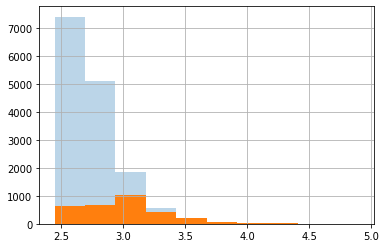

In [223]:
spb_data['ceiling_height'].hist(bins=10,alpha=0.3)
spb_center['ceiling_height'].hist(bins=10)

В центральной части Питера потолки выше, чем во всем остальном городе. Это связано с исторической застройкой. В былые времена нормы высоты потолков были другими. 

Оценим влияние даты размещения объявления для центральной части Санкт-Петербурга.

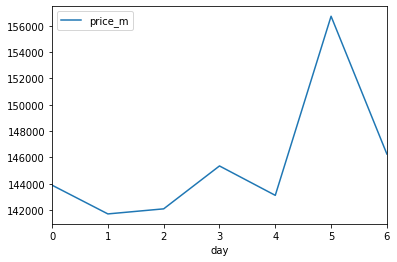

In [228]:
spb_center.pivot_table(index=['day'], values='price_m', aggfunc='mean').plot()

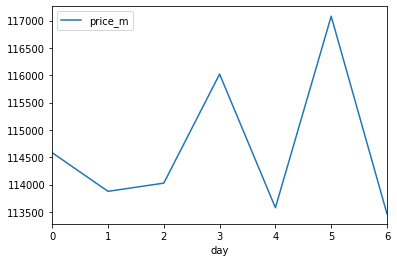

In [229]:
spb_data.pivot_table(index=['day'], values='price_m', aggfunc='mean').plot()

В Питере лучше всего выставлять объявления в субботу. Разницы для центральной части города и всей остольной нет. Но вот в сравнении с общей базой данных объявлений отличия есть. Для остальных городов лучший день размещения объявления является четверг.

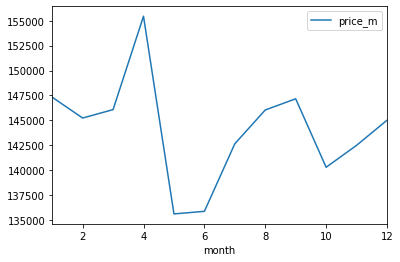

In [230]:
spb_center.pivot_table(index=['month'], values='price_m', aggfunc='mean').plot()

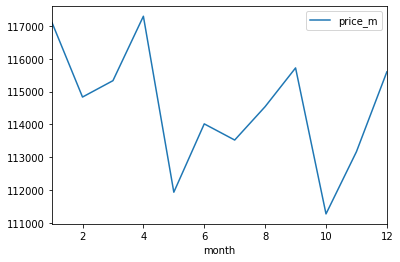

In [231]:
spb_data.pivot_table(index=['month'], values='price_m', aggfunc='mean').plot()

В Питере лучше всего выставлять квартиры на продажу в апреле, как и для остальной базы данных объявлений.


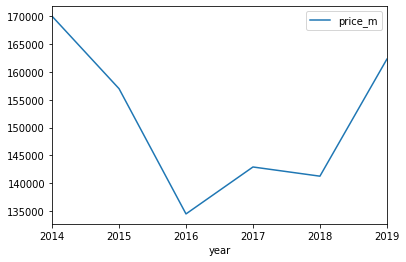

In [232]:
spb_center.pivot_table(index=['year'], values='price_m', aggfunc='mean').plot()

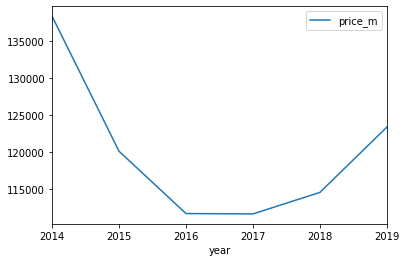

In [233]:
spb_data.pivot_table(index=['year'], values='price_m', aggfunc='mean').plot()

График для всего города полностью соотвествует тенденции по всей базе данных объявлений, однако в центральной части города рост стоимости квадратного метра недвижимости происходил быстрее.

Оценим, какие факторы в большей степени влияют на своимость с помощью матрицы корреляции.

In [179]:
spb_center.corr().style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day,month,year,living_total_area,kitchen_total_area,city_center_km
total_images,1,0.130048,0.0913208,0.0536215,0.0989557,-0.0411188,0.0719459,0.00548069,0.00767021,-0.027153,-0.0339538,0.0700633,0.014504,0.0141458,-0.00706669,0.0510178,-0.0259604,-0.0109151,-0.00496769,-0.0326986,0.153017,0.0178958,0.00334267,0.117284,-0.0297453,0.00037289,-0.0106974
last_price,0.130048,1,0.604715,0.314603,0.128353,0.0447867,0.536175,0.11957,0.0304759,-0.0211384,0.00391204,0.443424,0.075729,0.0884873,-0.0408344,0.0936066,-0.0275485,0.0770949,-0.0618519,0.0614411,0.817458,0.0283099,-0.00463422,-0.0654928,-0.00210016,-0.026498,-0.0440595
total_area,0.0913208,0.604715,1,0.734059,0.28257,-0.00829906,0.947411,0.106805,0.0446015,-0.0516192,0.00710998,0.570822,0.015839,0.03002,-0.0777222,0.103593,-0.0735238,-0.00725143,-0.0587748,0.138642,0.27058,0.00830013,-0.0156783,-0.1197,0.142376,-0.210839,-0.0828475
rooms,0.0536215,0.314603,0.734059,1,0.245436,-0.169041,0.79248,-0.0349705,0.000590368,-0.117828,-0.0524766,0.260529,-0.0746661,-0.0667344,-0.16537,0.117025,-0.112048,-0.0373614,-0.0548651,0.129904,0.0207403,-0.00963544,-0.0234465,-0.0959345,0.401285,-0.378856,-0.169108
ceiling_height,0.0989557,0.128353,0.28257,0.245436,1,-0.276394,0.302273,-0.159795,0.0794712,-0.0147883,0.00961422,0.109732,-0.112958,-0.0559117,-0.221927,0.151587,-0.134949,0.0116431,-0.0655736,0.0877319,0.0544341,-0.0309934,-0.00395864,-0.0143401,0.133491,-0.114172,-0.219665
floors_total,-0.0411188,0.0447867,-0.00829906,-0.169041,-0.276394,1,-0.0959582,0.658336,-0.0101101,-0.0132249,0.00269101,0.0471335,0.382187,0.0997669,0.327849,-0.261518,0.236384,-0.0490376,0.0667673,0.0173627,0.126764,0.0210335,0.00357639,-0.0287825,-0.319818,0.135829,0.319196
living_area,0.0719459,0.536175,0.947411,0.79248,0.302273,-0.0959582,1,0.0345514,0.0518166,-0.0386543,0.0142957,0.466201,-0.022024,-0.00402299,-0.114963,0.128065,-0.104233,-0.00866097,-0.051794,0.132731,0.202742,0.000752007,-0.0148818,-0.11336,0.395914,-0.305024,-0.120612
floor,0.00548069,0.11957,0.106805,-0.0349705,-0.159795,0.658336,0.0345514,1,0.00574167,-0.0304559,-0.00985992,0.0894147,0.292406,0.0499266,0.209468,-0.174516,0.143685,-0.0494308,0.0344579,0.0278175,0.142757,0.0421163,0.0191262,-0.0324953,-0.190775,0.0520301,0.206303
is_apartment,0.00767021,0.0304759,0.0446015,0.000590368,0.0794712,-0.0101101,0.0518166,0.00574167,1,-0.004019,-0.00296552,0.0123745,0.0191345,0.0151827,-0.0387863,0.0646798,-0.0450217,0.0455215,-0.0190701,0.0630415,0.048605,-0.0495582,0.0200431,-0.0270499,0.0405039,-0.00437515,-0.0392335
studio,-0.027153,-0.0211384,-0.0516192,-0.117828,-0.0147883,-0.0132249,-0.0386543,-0.0304559,-0.004019,1,-0.00296552,-0.0164615,0.0191345,0.000779865,0.00205325,-0.0445792,-0.0198221,0.00878344,0.0147753,-0.0377172,-0.00433852,0.00770666,0.0117022,0.0170418,0.0697569,0.0608819,0.00206147


Для центральной части все тоже самое, что и для всей базы данных объявлений: больше всего влияют технические характеристики объекта на его итогову стоимость (площадь, этаж).

## Общий вывод

Задачей данного проекта была установка параметров квартир, чтобы в дальнейшем построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность.  
В результате предобработки данных мы смогли откинуть ненужные значения, чтобы понят общую картину. Какие факторы влияют больше всего на стоимость жилья и определили "нормальное" стоотношение площади квартиры.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод